In [1]:
import pandas as pd
import numpy as np
import scipy
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Extract for T-test

Objective: create a table displaying the mean/median gini coefficients for all simulation scenarios

Get gini coef stats: mead / median / std.dev / distribution

But first! Create a big df with all simulation outputs:
a) total views, average views, median views, stdev views, Q1, Q3, total ratings, avg

In [ ]:
### Path parameters , select simulation
steps = 200
consumer = 'C3'
ifilter = 'None'
simulations = 100
#path = 'C:/Users/andre/OneDrive - Harrisburg University/Data/Simulations/'
path = 'C:/Simulations/'
file_name = ifilter+str(steps)
sim_path = path+file_name+'/'+consumer+'/50'        #COGNITIVE EXTENSION    50 percent
percentage = ''#'/100'

size = [[2000,400],[5000,1000],[10000,2000],[20000,4000]]#,[40000,8000]]

#Create dataframes from files
for consumer in ['C3']:#,'C30','C60']:
    df = load_basic(size[0],path,file_name,consumer,ifilter,simulations,steps,percentage)
    for s in size[1:]:
        dftemp = load_basic(s,path,file_name,consumer,ifilter,simulations,steps,percentage)
        df = df.append(dftemp,ignore_index=True)
    df.to_pickle('Results_F'+str(ifilter)+'_S'+str(steps)+'_C'+str(consumer))#+'_P'+str(100))


    

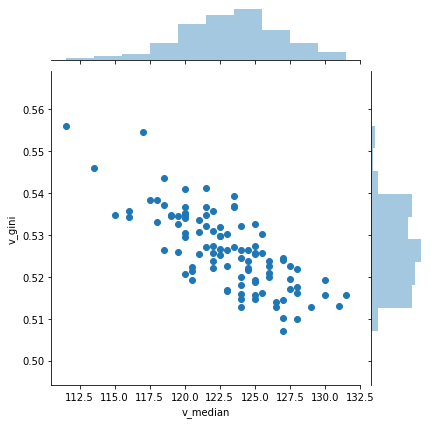

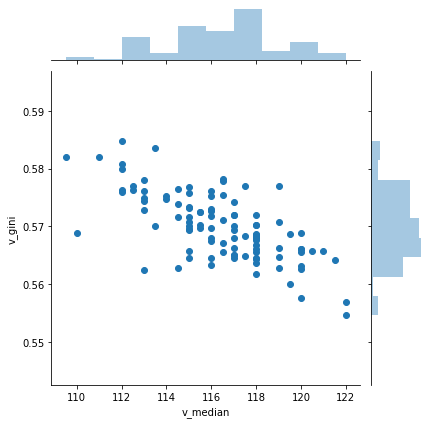

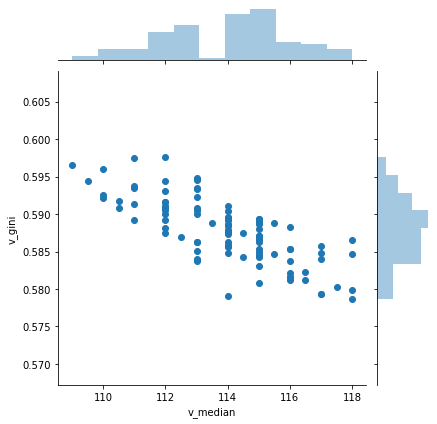

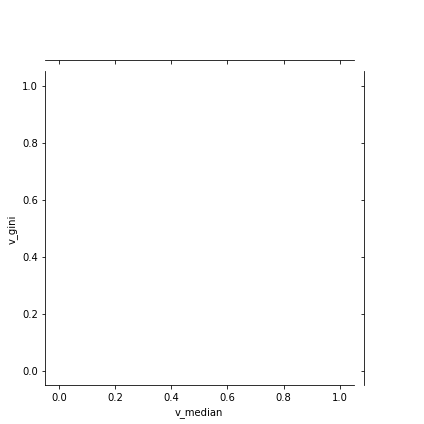

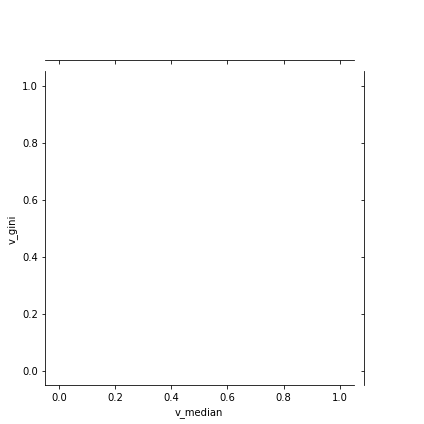

In [8]:
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==2000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==5000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==10000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==20000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==40000])
plt.show()

## Part 2 - Analysis

After extracting all statistics from all the simulations, proceed here. 
You should have a dataframe like this:


In [7]:
import pandas as pd
import numpy as np
import scipy
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [165]:
df = pd.read_pickle('Results_FSociological_S100_CC3_P50')
df.head()

,v_mean,v_median,v_std,v_total,v_minmax,v_gini,r_mean,r_median,r_std,r_total,r_minmax,r_gini,u_size,p_size,filter,u_cogni,steps
0,217.0475,129.0,408.286738,400,"[21.0, 3402.0]",0.484085,0.614736,0.614736,0.021158,400,"[0.5546018745942075, 0.6666660190061284]",0.019003,2000,400,Sociological,C3,100
1,216.5500,124.0,412.259691,400,"[25.0, 3440.0]",0.483234,0.612973,0.614961,0.022193,400,"[0.5438975713859443, 0.6561005519943169]",0.019755,2000,400,Sociological,C3,100
2,216.8300,127.0,412.198728,400,"[26.0, 3257.0]",0.478884,0.614378,0.613986,0.023065,400,"[0.49910044795289654, 0.6658786221546695]",0.020591,2000,400,Sociological,C3,100
3,214.7625,121.5,425.458107,400,"[16.0, 3655.0]",0.480935,0.615565,0.614437,0.020599,400,"[0.5436537315150352, 0.6685555666862427]",0.018358,2000,400,Sociological,C3,100
4,215.0000,125.0,450.035899,400,"[29.0, 3592.0]",0.482564,0.612350,0.611046,0.021992,400,"[0.546808542471803, 0.6646948464066106]",0.019729,2000,400,Sociological,C3,100



Now I will provide the basic functions / steps to create a table showing a comparisson between simulation parameter and response variable (i.e. gini coef).

## Relevance of Size

In [156]:
#How many sizes?
print(set(df.u_size))

{20000, 40000, 5000, 2000, 10000}


In [157]:
#Fix sizes we have:
sizes = [2000,5000,10000,20000,40000] 

In [158]:
print([np.mean(df[df['u_size']==i].v_gini) for i in sizes])

[0.5910130808651148, 0.6454360275845977, 0.6725805792476117, 0.696779423719207, 0.7143731450979897]


In [159]:
print([np.std(df[df['u_size']==i].v_gini) for i in sizes])

[0.02697336172401931, 0.022100293735611436, 0.015804455477409364, 0.011633441199477526, 0.007623467125959972]


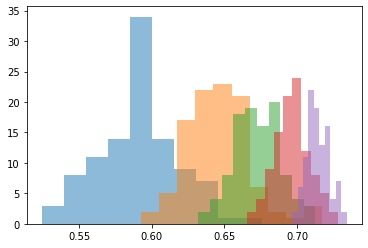

In [160]:
for i in sizes:
    plt.hist(df[df['u_size']==i].v_gini,alpha=0.5,bins=10)
plt.show()

In [161]:
test_d = {str(k):list(df[df['u_size']==k].v_gini) for k in sizes}
test_df = pd.DataFrame.from_dict(test_d)
test_df.head()

,2000,5000,10000,20000,40000
0,0.598521,0.592549,0.682465,0.665578,0.710533
1,0.596963,0.656742,0.680973,0.693231,0.734127
2,0.587296,0.706300,0.654552,0.692165,0.716576
3,0.622198,0.655920,0.682572,0.701842,0.704501
4,0.564806,0.609030,0.665852,0.697270,0.720724


In [162]:
save_list = []
for s in sizes:
    save_list.append(np.mean(test_df[str(s)]))
    print(str(s)+' '+str(np.mean(test_df[str(s)])))


2000 0.5910130808651148
5000 0.6454360275845977
10000 0.6725805792476117
20000 0.696779423719207
40000 0.7143731450979897


In [163]:
cogni_c30_p50 = save_list

In [166]:
cogni_df = {str('c3_p50'):cogni_c3_p50,str('c3_p100'):cogni_c3_p100}#,str('c30_p50'):cogni_c30_p50,str('c30_p100'):cogni_c30_p100}

In [168]:
cognidf = pd.DataFrame(cogni_df)
cognidf.index = sizes
cognidf

,c3_p50,c3_p100
2000,0.591013,0.610034
5000,0.645436,0.669819
10000,0.672581,0.701285
20000,0.696779,0.727187
40000,0.714373,0.745863


In [115]:
nonedf = pd.DataFrame(none_df)

In [132]:
nonedf.index = sizes

In [133]:
nonedf

,c3,c30,c60
2000,0.199453,0.180128,0.126872
5000,0.206785,0.259510,0.208289
10000,0.209065,0.302485,0.267830
20000,0.210219,0.328759,0.311435
40000,0.211397,0.344546,0.338169


In [134]:
nonedf.to_pickle('None_Size_vs_UserSearch_over_Gini')

Ok. Lets compare these simulation outputs with an Independent Sample T-Test.

Let's check for assumptions:

In [127]:
#Testing for Normality:
for s in sizes:
    w,p = scipy.stats.shapiro(list(test_df[str(s)]))
    print('Size: '+str(s)+' . SWstat: '+str(w)+' . p-value: '+str(p))
    if p > 0.05:
        print('Can not reject H0 of normal distribution')
    else:
        print('Reject H0. NOT NORMAL DISTRIBUTION')
    print()

Size: 2000 . SWstat: 0.9923982620239258 . p-value: 0.8407928347587585
Can not reject H0 of normal distribution

Size: 5000 . SWstat: 0.9925766587257385 . p-value: 0.8532465696334839
Can not reject H0 of normal distribution

Size: 10000 . SWstat: 0.9877225160598755 . p-value: 0.4733305871486664
Can not reject H0 of normal distribution

Size: 20000 . SWstat: 0.9753060340881348 . p-value: 0.05274930223822594
Can not reject H0 of normal distribution

Size: 40000 . SWstat: 0.9920269250869751 . p-value: 0.8137485980987549
Can not reject H0 of normal distribution



Ok. They appear to not follow something else. We assume then that the distribution is normal.
Thus, as normal and independent samples, we proceed with the two sample t-test between all sizes.

In [128]:
#Get two-sample t-test related
for s in range(len(sizes)-1):
    t,p = scipy.stats.ttest_rel(test_df[str(sizes[s])],test_df[str(sizes[s+1])])
    print('Sizes: '+str(sizes[s])+' vs '+str(sizes[s+1])+' - T-test: '+str(t)+', p-value: '+str(p))

Sizes: 2000 vs 5000 - T-test: -116.28768046454108, p-value: 2.169783287984658e-109
Sizes: 5000 vs 10000 - T-test: -93.76596252365651, p-value: 4.923675824219067e-100
Sizes: 10000 vs 20000 - T-test: -89.31055239519618, p-value: 6.345501599609724e-98
Sizes: 20000 vs 40000 - T-test: -66.43706450193584, p-value: 3.648373590463722e-85


In [129]:
#Get two-sample t-test independent
for s in range(len(sizes)-1):
    t,p = scipy.stats.ttest_ind(test_df[str(sizes[s])],test_df[str(sizes[s+1])])
    print('Sizes: '+str(sizes[s])+' vs '+str(sizes[s+1])+' - T-test: '+str(t)+', p-value: '+str(p))

Sizes: 2000 vs 5000 - T-test: -122.2052639710504, p-value: 2.5740331223192763e-191
Sizes: 5000 vs 10000 - T-test: -101.09167227442256, p-value: 6.058423160540451e-175
Sizes: 10000 vs 20000 - T-test: -91.34379265820498, p-value: 3.0754275451588274e-166
Sizes: 20000 vs 40000 - T-test: -66.26460606747476, p-value: 5.335336000482594e-139


## Results

It appears that size does affect the gini coefficient. The mean differences are significant and it stronger for the lower ranges.


## Explore Default simulation 

How does views? and Ratings behave?

Mean


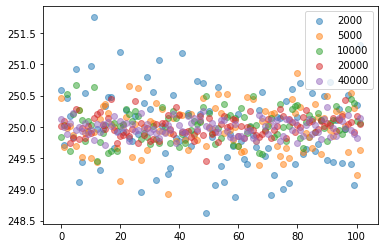

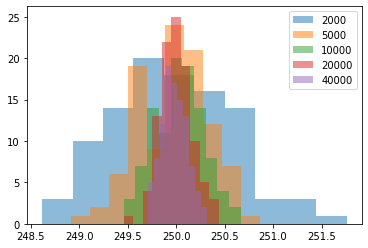

Median


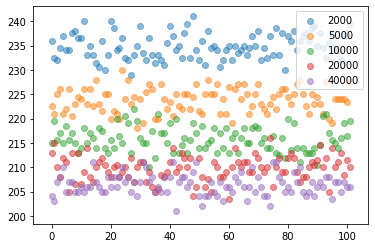

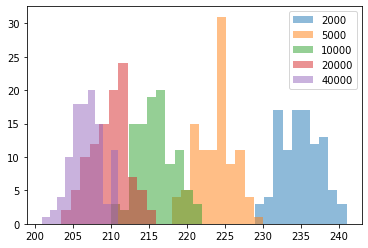

In [130]:
#MEAN
print('Mean')
for s in sizes:
    plt.scatter(range(len(list(df[df['u_size']==s].v_mean))),list(df[df['u_size']==s].v_mean),alpha=0.5,label=str(s))
plt.legend()
plt.show()

for s in sizes:
    plt.hist(list(df[df['u_size']==s].v_mean),alpha=0.5,label=str(s))
plt.legend()
plt.show()
    
#MEDIAN
print('Median')
for s in sizes:
    plt.scatter(range(len(list(df[df['u_size']==s].v_median))),list(df[df['u_size']==s].v_median),alpha=0.5,label=str(s))
plt.legend()
plt.show()

for s in sizes:
    plt.hist(list(df[df['u_size']==s].v_median),alpha=0.5,label=str(s))
plt.legend()
plt.show()

We see that the mean does change, significatively increasing as we move between simulation sizes.
But, it is also possible to see that this increased average is moving within the range of smaller simulation sizes. Meaning, that the average appers to be stabilizing below 0.22, regardless of size. So, we should expect an "all else equal" default situation with an expected gini of 0.21 and 0.22. Particularly if we use simulation size: 10000, 20000, and 40000 users per simulation. 

In [67]:
scipy.stats.ttest_rel(g4,g5)

Ttest_relResult(statistic=-1.4146468959484344, pvalue=0.1602476150424726)

In [68]:
ifilter = 'Cognitive'
cdf00 = pd.read_pickle('C:/Simulations/'+str([2000,400,ifilter,simulations]))
cdf11 = pd.read_pickle('C:/Simulations/'+str([5000,1000,ifilter,simulations]))
cdf22 = pd.read_pickle('C:/Simulations/'+str([10000,2000,ifilter,simulations]))
cdf33 = pd.read_pickle('C:/Simulations/'+str([20000,4000,ifilter,simulations]))
cdf44 = pd.read_pickle('C:/Simulations/'+str([40000,8000,ifilter,simulations]))


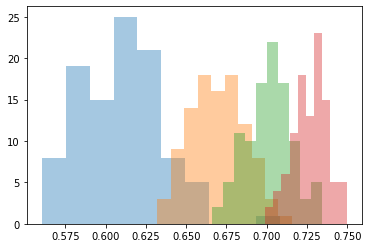

In [70]:
for i in [cdf00,cdf11,cdf22,cdf33]:
    plt.hist(get_gini(i),alpha=0.4,bins=10)

In [59]:
cg1 = get_gini(cdf11)
cg2 = get_gini(cdf22)
cg3 = get_gini(cdf33)

C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


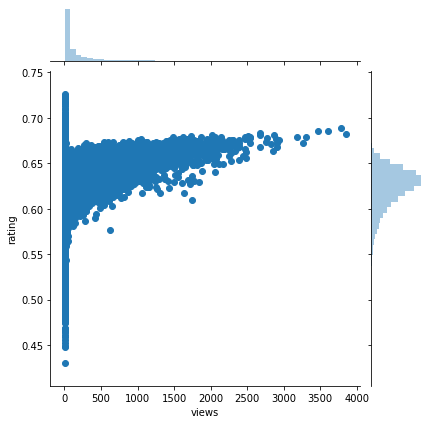

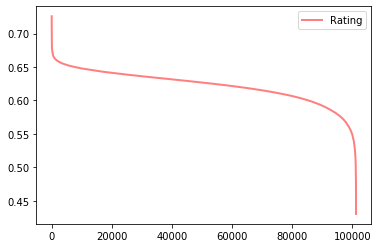

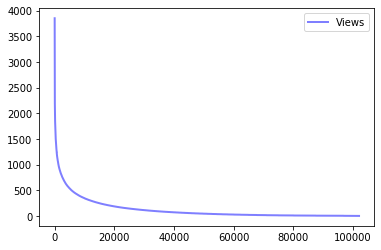

In [60]:
cdf1 = get_basics(cdf11)

In [ ]:
df1

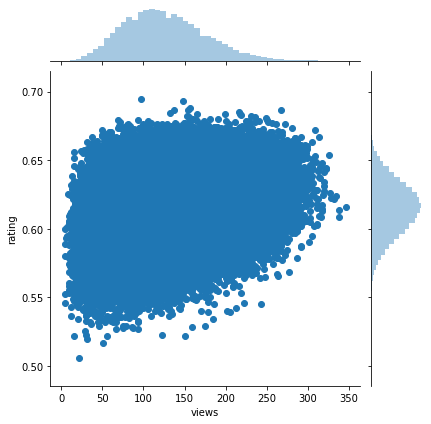

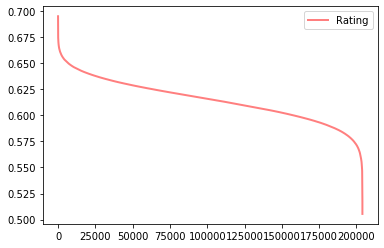

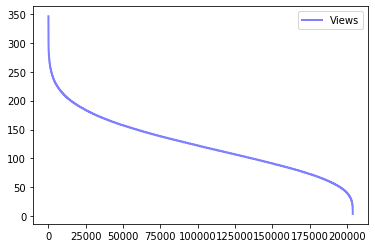

In [27]:
df2 = get_basics(df22)

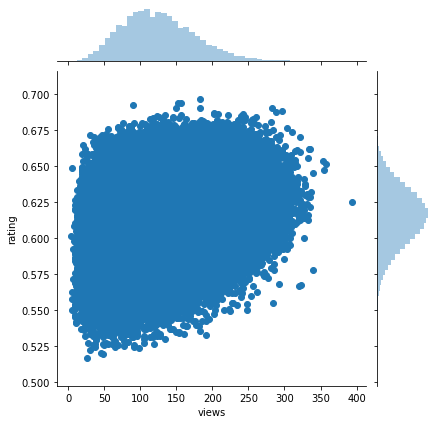

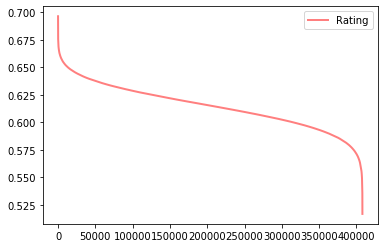

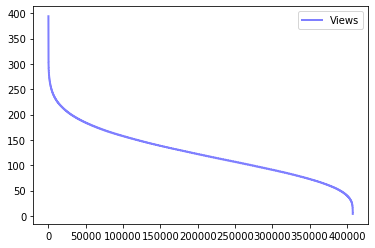

In [28]:
df3 = get_basics(df33)

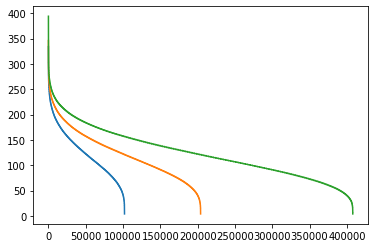

In [33]:
plt.plot(list(df.views))
plt.plot(list(df2.views))
plt.plot(list(df3.views))


In [6]:
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

def plot_gini(v):
    bins, result, gini_val = G(v)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(bins, result, label="observed")
    plt.plot(bins, bins, '--', label="perfect eq.")
    plt.xlabel("fraction of population")
    plt.ylabel("fraction of wealth")
    plt.title("GINI: %.4f" %(gini_val))
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.hist(v, bins=20)

In [7]:
plot_gini(df.views)
plot_gini(df2.views)
plot_gini(df3.views)

NameError: name 'df' is not defined

In [13]:
G(df1.views)[-1]

0.20554719387365095

In [31]:
views_sim = {}
id_ = 0
for vals in df11.values:
        t_views = []
        for i in vals:
            t_views.append(len(i))
        views_sim[id_] = t_views
        id_ += 1
            

In [32]:
gini = [G(np.array(views_sim[k]))[-1] for k in range(0,len(df11))]

In [33]:
gini

[0.2077968790053832,
 0.20532536329300302,
 0.20623247341551687,
 0.2061027093890907,
 0.20692321237053984,
 0.20588122360168953,
 0.2025967694238192,
 0.1999543400942036,
 0.2082715495844609,
 0.2057965906177903,
 0.21142166598865714,
 0.19532872939204027,
 0.20922331651853637,
 0.2039480111793582,
 0.21055226667092183,
 0.20977845500889533,
 0.20677327562021564,
 0.19481176969280115,
 0.202342772842436,
 0.20168859281269724,
 0.2083650917672572,
 0.21060547997700704,
 0.20713898758783325,
 0.20678279377170375,
 0.2056677080829929,
 0.20789941254622,
 0.21099448311255092,
 0.20372154604476073,
 0.20691051068314645,
 0.1953661752367254,
 0.2078450955169741,
 0.20326193028203943,
 0.20949884336153554,
 0.205343657852468,
 0.20594923046172298,
 0.20932089905299536,
 0.20549420673442137,
 0.2118934797573118,
 0.20201114727355599,
 0.20807160904467964,
 0.2077933702010677,
 0.21106978080748412,
 0.20492710106297563,
 0.20758378128339683,
 0.2067459019662585,
 0.20935750061909383,
 0.207768

0
0


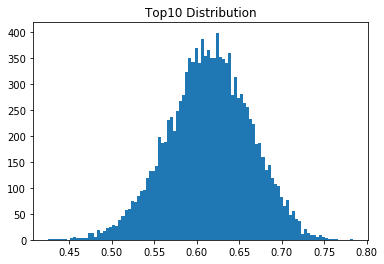

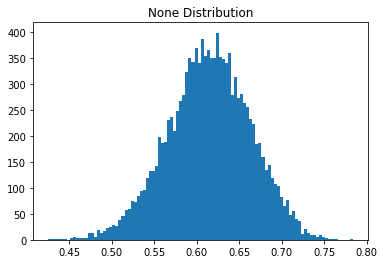

In [10]:
top10_r = get_parameter_filter(ifilter,0,df)
top10_r = clean_values(top10_r)
top10_r.sort(reverse=True)

none_r = get_parameter_filter(ifilter,0,df)
none_r = clean_values(none_r)
none_r.sort(reverse=True)

top10_r = [i for i in top10_r if i < 400]
plt.title('Top10 Distribution')
plt.hist(top10_r,bins=100)
plt.show()

plt.title('None Distribution')
plt.hist(none_r,bins=100)
plt.show()

# Views

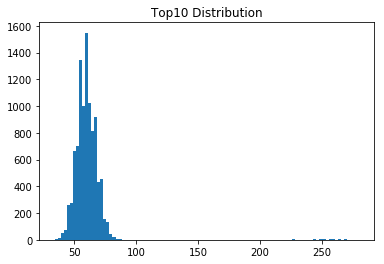

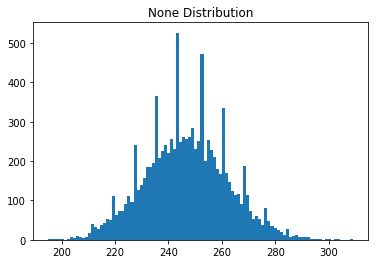

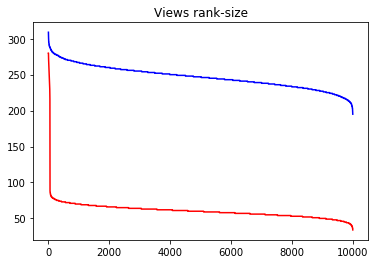

In [75]:
top10_v = get_parameter_filter(ifilter,1,df_top10)
top10_v.sort(reverse=True)

none_v = get_parameter_filter(ifilter,1,df_none)
none_v.sort(reverse=True)

plt.title('Top10 Distribution')
plt.hist(top10_v,bins=100)
plt.show()

plt.title('None Distribution')
plt.hist(none_v,bins=100)
plt.show()

none_v.sort(reverse=True)
top10_v.sort(reverse=True)
plt.plot(none_v,label='None',c='b')
plt.plot(top10_v,label='None',c='r')
plt.title('Views rank-size')
plt.show()

# T-test before Views ranking fix.

In [69]:
#For Ratings
var10 = np.var(top10_r)
varN = np.var(none_r)

In [70]:
var10, varN

(3412.9609159084025, 60354.49047292651)

In [71]:
#Then, calculate T-test for two independent sasmples, identical variances.
stats.ttest_ind(none_r,top10_r,axis=0,equal_var=False)

Ttest_indResult(statistic=-1.1689897066292625, pvalue=0.2424328103853359)

In [72]:
from scipy import stats